In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
transaction = pd.read_csv('KPMG_transaction.csv', index_col=0)

In [3]:
transaction.head(-1)

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
transaction_id,,,,,,,,,,,,,,,,,,,,,
1,2,2950,2/25/17,False,Approved,Solex,Standard,medium,medium,71.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3120,5/21/17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37,402,10/16/17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,88,3135,8/31/17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,787,10/1/17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,9,718,5/13/17,True,Approved,OHM Cycles,Road,medium,medium,742.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,51,1018,6/24/17,True,Approved,OHM Cycles,Standard,high,medium,2005.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,41,127,11/9/17,True,Approved,Solex,Road,medium,medium,416.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
transaction.customer_id.dtypes

dtype('int64')

In [5]:
transaction.customer_id.isnull().sum()

0

In [6]:
total_numer_of_customer = transaction.customer_id.nunique()

In [7]:
print('total numer of customer is', total_numer_of_customer)

total numer of customer is 3494


In [8]:
transaction['transaction_datetime'] = pd.to_datetime(transaction.transaction_date)

In [9]:
transaction['transaction_month'] = transaction.transaction_datetime.dt.month

In [10]:
total_customer_in_past_month = transaction[transaction.transaction_month==12].customer_id.nunique()

In [11]:
print('total customer in past month is', total_customer_in_past_month)

total customer in past month is 1322


In [12]:
last_four_month_customer = transaction.transaction_month.value_counts().sort_index().iloc[-4:]

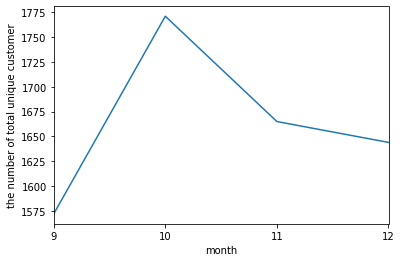

In [13]:
last_four_month_customer.plot()
plt.xlim(9,12)
my_x_ticks = np.arange(9,13,1)
plt.xticks(my_x_ticks)
plt.xlabel('month')
plt.ylabel('the number of total unique customer')
plt.show()

In [14]:
transaction.columns

Index(['product_id', 'customer_id', 'transaction_date', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price',
       ...
       'Unnamed: 248', 'Unnamed: 249', 'Unnamed: 250', 'Unnamed: 251',
       'Unnamed: 252', 'Unnamed: 253', 'Unnamed: 254', 'Unnamed: 255',
       'transaction_datetime', 'transaction_month'],
      dtype='object', length=257)

In [15]:
transaction = transaction.loc[:, ~transaction.columns.str.contains('^Unnamed')]

In [16]:
transaction.columns

Index(['product_id', 'customer_id', 'transaction_date', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'transaction_datetime', 'transaction_month'],
      dtype='object')

In [17]:
total_spend = round(transaction.list_price.sum())

In [18]:
print('total spend is', total_spend)

total spend is 22156589.0


In [19]:
total_spend_in_past_month = round(transaction[transaction.transaction_month==12].list_price.sum())

In [20]:
print('total spend in past month is', total_spend_in_past_month)

total spend in past month is 1811865.0


In [21]:
last_four_month_spend = transaction.groupby('transaction_month').list_price.sum().iloc[-4:]

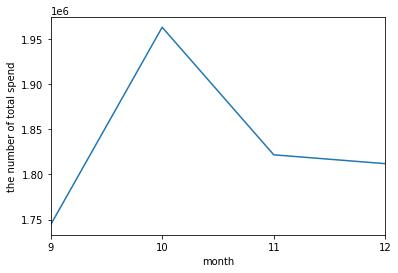

In [22]:
last_four_month_spend.plot()
plt.xlim(9,12)
my_x_ticks = np.arange(9,13,1)
plt.xticks(my_x_ticks)
plt.xlabel('month')
plt.ylabel('the number of total spend')
plt.show()

In [23]:
transaction.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_datetime,transaction_month
transaction_id,,,,,,,,,,,,,,
1,2,2950,2/25/17,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,2017-02-25,2
2,3,3120,5/21/17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,2017-05-21,5
3,37,402,10/16/17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,2017-10-16,10
4,88,3135,8/31/17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0,2017-08-31,8
5,78,787,10/1/17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0,2017-10-01,10


In [24]:
transaction['combined_product_class'] = transaction.brand.str.cat([transaction.product_line, transaction.product_class], sep=': ')

In [25]:
top_10_goods = transaction.combined_product_class.value_counts(ascending=False).iloc[:10]

In [26]:
print(top_10_goods)

Solex: Standard: medium             2532
WeareA2B: Standard: medium          2346
Giant Bicycles: Standard: medium    1769
Trek Bicycles: Standard: medium     1254
OHM Cycles: Standard: medium        1079
Norco Bicycles: Standard: medium     980
Giant Bicycles: Standard: high       785
Norco Bicycles: Road: medium         732
Trek Bicycles: Road: medium          625
WeareA2B: Touring: medium            618
Name: combined_product_class, dtype: int64


In [27]:
demographics = pd.read_csv('KPMG_demographics.csv', index_col=0)

In [28]:
demographics.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
customer_id,,,,,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,1-Feb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
demographics = demographics.loc[:, ~demographics.columns.str.contains('^Unnamed')]

In [30]:
demographics = demographics.drop(columns='default')

In [31]:
demographics.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
customer_id,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [32]:
demographics.shape

(4000, 11)

In [33]:
demographics.gender.value_counts()

Female    2037
Male      1872
U           88
M            1
Femal        1
F            1
Name: gender, dtype: int64

In [34]:
demographics['gender'] = demographics.gender.replace('F', 'Female')

In [35]:
demographics.gender.value_counts()

Female    2038
Male      1872
U           88
M            1
Femal        1
Name: gender, dtype: int64

In [36]:
demographics['gender'] = demographics.gender.replace('M', 'Male')

In [37]:
demographics.gender.value_counts()

Female    2038
Male      1873
U           88
Femal        1
Name: gender, dtype: int64

In [38]:
demographics['gender'] = demographics.gender.replace('Femal', 'Female')

In [39]:
demographics.gender.value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [40]:
demographics.DOB.isnull().sum()

87

In [41]:
demographics['date_of_birth_datetime'] = pd.to_datetime(demographics.DOB)

In [42]:
demographics['age'] = pd.datetime.today().year - demographics.date_of_birth_datetime.dt.year

In [43]:
demographics.age

customer_id
1       67.0
2       40.0
3       66.0
4       59.0
5       43.0
        ... 
3996    45.0
3997    19.0
3998     NaN
3999    47.0
4000    29.0
Name: age, Length: 4000, dtype: float64

In [44]:
demographics.age.value_counts(dropna=False).sort_index()

18.0       6
19.0      34
20.0      42
21.0      60
22.0      80
23.0      74
24.0      67
25.0      90
26.0      79
27.0      60
28.0      74
29.0      48
30.0      53
31.0      74
32.0      72
33.0      72
34.0     114
35.0      91
36.0      43
37.0      40
38.0      41
39.0      79
40.0     123
41.0     118
42.0     217
43.0     204
44.0     152
45.0     114
46.0     152
47.0     122
48.0      54
49.0      88
50.0      57
51.0      78
52.0      69
53.0      73
54.0      65
55.0      69
56.0      85
57.0      59
58.0      76
59.0      60
60.0      58
61.0      94
62.0      55
63.0      71
64.0      63
65.0      58
66.0      61
67.0      19
76.0       1
77.0       1
80.0       1
85.0       1
89.0       1
177.0      1
NaN       87
Name: age, dtype: int64

In [45]:
demographics['age'] = demographics.age.replace(177, np.nan)

In [46]:
female_group = demographics[demographics.gender=='Female']

In [47]:
male_group = demographics[demographics.gender=='Male']

In [48]:
female_demo = pd.cut(female_group.age, bins=[0, 20, 29, 39, 49, 59, 69, 79, 89]).value_counts().sort_index()

In [49]:
male_demo = pd.cut(male_group.age, bins=[0, 20, 29, 39, 49, 59, 69, 79, 89]).value_counts().sort_index()

In [50]:
print(female_demo)

(0, 20]      42
(20, 29]    314
(29, 39]    358
(39, 49]    714
(49, 59]    367
(59, 69]    242
(69, 79]      0
(79, 89]      2
Name: age, dtype: int64


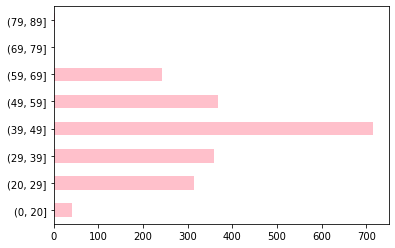

In [51]:
female_demo.plot(kind='barh', color='pink')
plt.show()

In [52]:
print(male_demo)

(0, 20]      40
(20, 29]    318
(29, 39]    321
(39, 49]    630
(49, 59]    324
(59, 69]    237
(69, 79]      2
(79, 89]      1
Name: age, dtype: int64


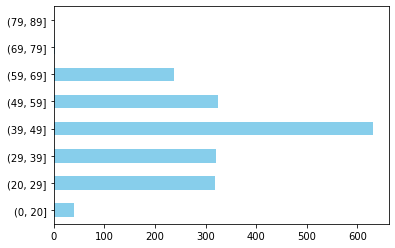

In [53]:
male_demo.plot(kind='barh', color='skyblue')
plt.show()

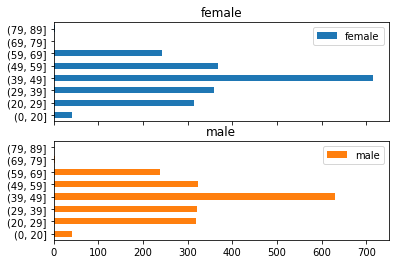

In [70]:
df = pd.DataFrame({'female': female_demo,
                   'male': male_demo})
axes = df.plot.barh(rot=0, subplots=True)
axes[1].legend()
plt.show()

In [55]:
newcustomer = pd.read_csv('KPMG_newcustomer.csv')

In [56]:
newcustomer = newcustomer.loc[:, ~newcustomer.columns.str.contains('^Unnamed')]

In [57]:
newcustomer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6.0,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11.0,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5.0,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1.0,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9.0,4,1.703125


In [58]:
newcustomer['name'] = newcustomer.first_name.str.cat(newcustomer.last_name, sep=' ')

In [59]:
newcustomer.set_index(newcustomer.name, inplace=True)

In [60]:
newcustomer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,name
name,,,,,,,,,,,,,,,,,,,
Chickie Brister,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6.0,1,1.718750,Chickie Brister
Morly Genery,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11.0,1,1.718750,Morly Genery
Ardelis Forrester,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5.0,1,1.718750,Ardelis Forrester
Lucine Stutt,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1.0,4,1.703125,Lucine Stutt
Melinda Hadlee,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9.0,4,1.703125,Melinda Hadlee


In [61]:
target_costomers = newcustomer.loc[:, ['job_title', 'address', 'postcode', 'state', 'Rank']]

In [62]:
print(target_costomers.sort_values(by=['Rank', 'name']).head(200))

                                              job_title               address  \
name                                                                            
Ardelis Forrester                Senior Cost Accountant   5 Colorado Crossing   
Chickie Brister                         General Manager      45 Shopko Center   
Morly Genery                        Structural Engineer     14 Mccormick Park   
Lucine Stutt                 Account Representative III    207 Annamark Plaza   
Melinda Hadlee                        Financial Analyst     115 Montana Place   
...                                                 ...                   ...   
Charlena Berney                     Geological Engineer      496 Logan Center   
Collete Dory                Information Systems Manager     8625 Dakota Plaza   
Leonid Dorricott                     Environmental Tech       02 Hoffman Road   
Mandie Jeffryes    Business Systems Development Analyst  96515 Di Loreto Pass   
Vincent Jopke             An

In [63]:
address = pd.read_csv('KPMG_address.csv', index_col=0)

In [64]:
address = address.loc[:, ~address.columns.str.contains('^Unnamed')]

In [65]:
address.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [66]:
address.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [67]:
address = address.replace({'state': {'New South Wales': 'NSW', 'Victoria': 'VIC'}})

In [68]:
address.state.value_counts(normalize=True)

NSW    0.535134
VIC    0.255314
QLD    0.209552
Name: state, dtype: float64

In [69]:
target_costomers.state.value_counts(normalize=True)

NSW    0.506
VIC    0.266
QLD    0.228
Name: state, dtype: float64